In [86]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [87]:
df = pd.read_csv('ford.csv')	
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17965 entries, 0 to 17964
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17965 non-null  object 
 1   year          17965 non-null  int64  
 2   price         17965 non-null  int64  
 3   transmission  17965 non-null  object 
 4   mileage       17965 non-null  int64  
 5   fuelType      17965 non-null  object 
 6   tax           17965 non-null  int64  
 7   mpg           17965 non-null  float64
 8   engineSize    17965 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [89]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000,17965.000000
mean,2016.866574,12279.756415,23363.630504,113.334539,57.906991,1.350827
std,2.050346,4741.382606,19472.114690,62.010438,10.125977,0.432371
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18243.000000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31064.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [90]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [91]:
la = LabelEncoder()
df["model"] = la.fit_transform(df["model"])
df["transmission"] = la.fit_transform(df["transmission"])
df["fuelType"] = la.fit_transform(df["fuelType"])
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,12000,0,15944,4,150,57.7,1.0
1,6,2018,14000,1,9083,4,150,57.7,1.0
2,6,2017,13000,1,12456,4,150,57.7,1.0
3,5,2019,17500,1,10460,4,145,40.3,1.5
4,5,2019,16500,0,1482,4,145,48.7,1.0


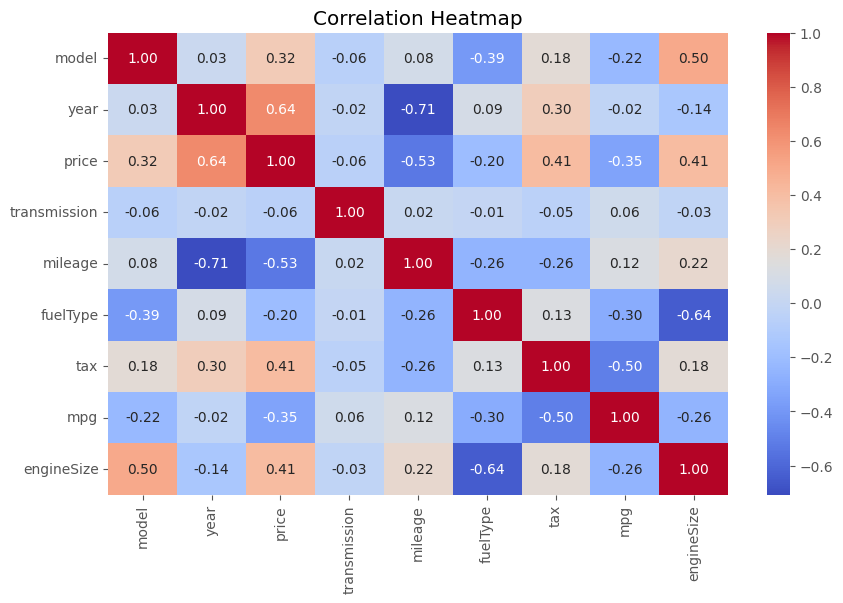

In [92]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

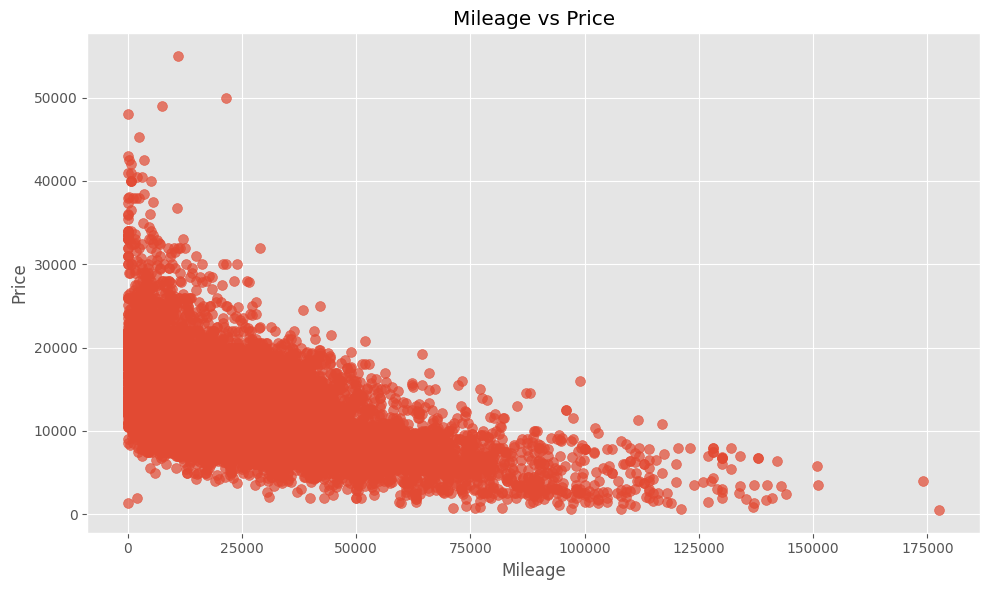

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(df['mileage'], df['price'], alpha=0.7, s=50)

plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

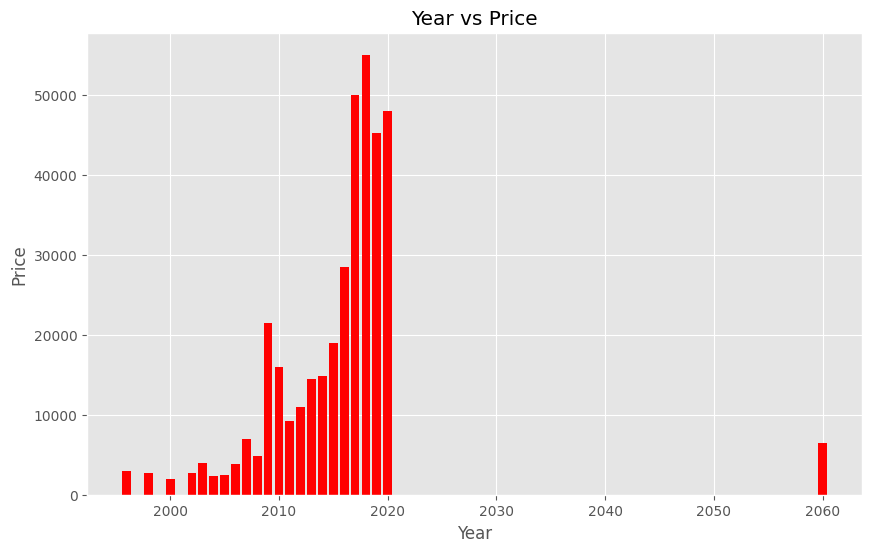

In [99]:
plt.figure(figsize=(10, 6))
plt.bar(df['year'], df['price'], color='red')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Year vs Price')
plt.show()

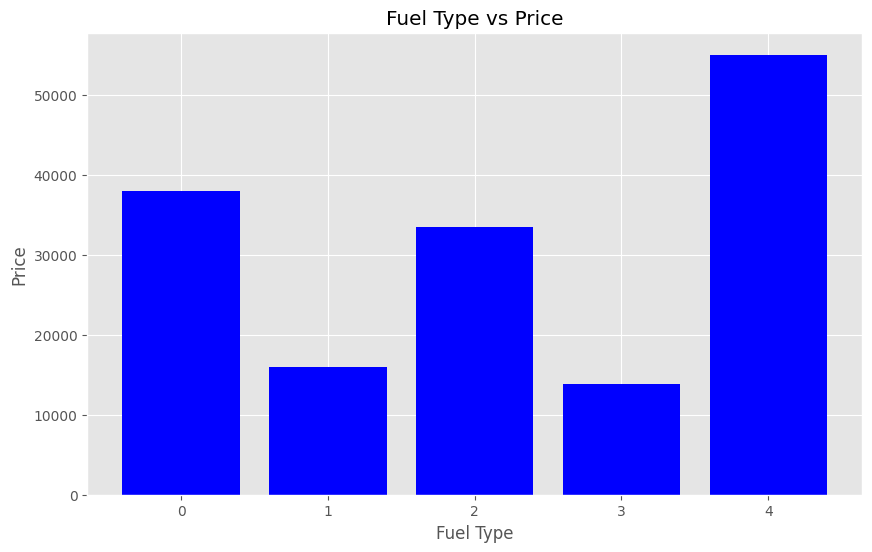

In [93]:
plt.figure(figsize=(10, 6))
plt.bar(df['fuelType'], df['price'], color='blue')
plt.title('Fuel Type vs Price')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()


In [94]:
X = df.drop(columns=["price"])
y = df["price"]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  #test edilecek veri oranı %20

_dict = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=9, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

Linear Regression - MSE: 5835063.266721747, R2: 0.7392539116662415, MAE: 1768.0324067022577
Decision Tree - MSE: 2364224.2619534717, R2: 0.8943520918163969, MAE: 1074.7944875361327


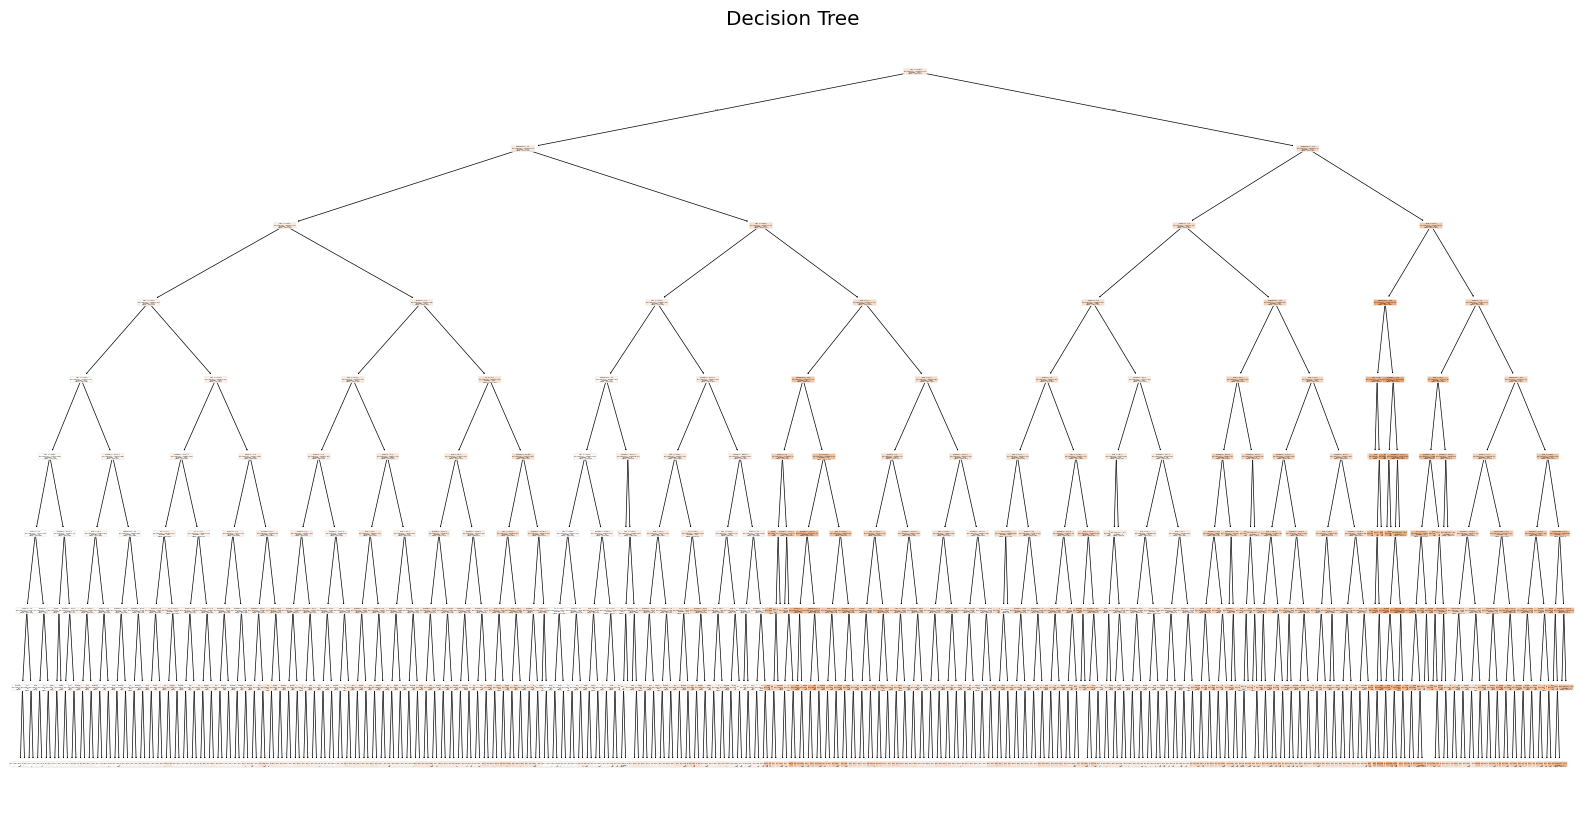

Random Forest - MSE: 1594357.3394201514, R2: 0.9287544246467813, MAE: 864.499596725676


In [96]:
for name, model in _dict.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"{name} - MSE: {mse}, R2: {r2}, MAE: {mae}")
    if name == "Decision Tree":
        plt.figure(figsize=(20, 10))
        plot_tree(model, filled=True, feature_names=X.columns, rounded=True)
        plt.title("Decision Tree")
        plt.show()